In [1]:
import MEArec as mr


In [2]:
#generate templates 
temp_params = mr.get_default_templates_params()
print(temp_params)

{'sim_time': 1, 'target_spikes': [3, 50], 'cut_out': [2, 5], 'dt': 0.03125, 'delay': 10, 'weights': [0.25, 1.75], 'rot': 'physrot', 'probe': 'Neuronexus-32', 'ncontacts': 10, 'overhang': 30, 'offset': 0, 'xlim': [10, 80], 'ylim': None, 'zlim': None, 'min_amp': 30, 'n': 50, 'seed': None, 'drifting': False, 'max_drift': 100, 'min_drift': 30, 'drift_steps': 30, 'drift_xlim': [-10, 10], 'drift_ylim': [-10, 10], 'drift_zlim': [30, 80], 'check_for_drift_amp': False, 'drift_within_bounds': False}


In [3]:
#get default cell models folder
cell_folder = mr.get_default_cell_models_folder()
print(cell_folder)

C:\Users\hoenigsperger\.config\mearec\1.7.2\cell_models\bbp


In [5]:
temp_params['seed'] = 0

In [4]:
temp_params['n'] = 10

In [5]:
#simulate templates
tempgen = mr.gen_templates(cell_models_folder = cell_folder, params = temp_params, verbose= True, recompile= True)

Compiling NEURON models
Setting n_jobs to 2 CPUs
Running with 2 jobs



Simulation time: 1537.250601530075





In [6]:
tempgen

In [10]:
mr.save_template_generator(tempgen, r'C:\Users\hoenigsperger\mearec/tempgen1.h5')


Saved  templates in C:\Users\hoenigsperger\mearec\tempgen1.h5 



In [3]:
mr.load_templates(r'C:\Users\hoenigsperger\mearec\tempgen1.h5')

In [4]:
recording_params = mr.get_default_recordings_params()

In [5]:
print(recording_params)

{'spiketrains': {'n_exc': 7, 'n_inh': 3, 'f_exc': 5, 'f_inh': 15, 'st_exc': 1, 'st_inh': 3, 'min_rate': 0.5, 'ref_per': 2, 'process': 'poisson', 'gamma_shape': 2, 't_start': 0, 'duration': 10}, 'cell_types': {'excitatory': ['PC', 'SS', 'SP'], 'inhibitory': ['AC', 'BP', 'BC', 'BTC', 'ChC', 'DBC', 'MC', 'NGC']}, 'seeds': {'spiketrains': None, 'templates': None, 'convolution': None, 'noise': None}, 'templates': {'min_dist': 25, 'min_amp': 50, 'max_amp': 300, 'n_overlap_pairs': None, 'xlim': None, 'ylim': None, 'zlim': None, 'overlap_threshold': 0.9, 'n_jitters': 10, 'upsample': 8, 'pad_len': [3, 3]}, 'recordings': {'fs': None, 'dtype': 'float32', 'overlap': False, 'extract_waveforms': False, 'sync_rate': None, 'sync_jitt': 1, 'chunk_duration': 0, 'modulation': 'electrode', 'sdrand': 0.05, 'bursting': False, 'bursting_units': None, 'exp_decay': 0.2, 'n_burst_spikes': 10, 'max_burst_duration': 100, 'shape_mod': False, 'shape_stretch': 30.0, 'n_bursting': None, 'noise_level': 10, 'noise_mode

In [6]:
recording_params['spiketrains']['n_exc']=4

recording_params['spiketrains']['n_inh']=1

recording_params['spiketrains']['duration']

10

In [21]:
recording_params['seeds']['spiketrains']=0

recording_params['recordings']['noise_level']=5
recording_params['recordings']['n_burst_spikes']=0

In [8]:
recording_params['seeds']['templates']=1

recording_params['filter_cutoff']=[300,6000]

In [28]:
#recording_params['seeds']['noise']=2

In [9]:
recording_params['seeds']['convolution']=3

In [22]:
print(recording_params)

{'spiketrains': {'n_exc': 4, 'n_inh': 1, 'f_exc': 5, 'f_inh': 15, 'st_exc': 1, 'st_inh': 3, 'min_rate': 0.5, 'ref_per': 2, 'process': 'poisson', 'gamma_shape': 2, 't_start': 0, 'duration': 10, 'noise_level': 2}, 'cell_types': {'excitatory': ['PC', 'SS', 'SP'], 'inhibitory': ['AC', 'BP', 'BC', 'BTC', 'ChC', 'DBC', 'MC', 'NGC']}, 'seeds': {'spiketrains': 0, 'templates': 1, 'convolution': 3, 'noise': 3878}, 'templates': {'min_dist': 25, 'min_amp': 50, 'max_amp': 300, 'n_overlap_pairs': None, 'xlim': None, 'ylim': None, 'zlim': None, 'overlap_threshold': 0.9, 'n_jitters': 10, 'upsample': 8, 'pad_len': [3, 3]}, 'recordings': {'fs': None, 'dtype': 'float32', 'overlap': False, 'extract_waveforms': False, 'sync_rate': None, 'sync_jitt': 1, 'chunk_duration': 0, 'modulation': 'electrode', 'sdrand': 0.05, 'bursting': False, 'bursting_units': None, 'exp_decay': 0.2, 'n_burst_spikes': 0, 'max_burst_duration': 100, 'shape_mod': False, 'shape_stretch': 30.0, 'n_bursting': None, 'noise_level': 5, 'noi

In [23]:
recgen = mr.gen_recordings(params= recording_params, templates= r'C:\Users\hoenigsperger\mearec\tempgen1.h5')

Spiketrains seed:  0
Noise Level  5
Templates selection seed:  1
Selecting cells
Padding template edges
Elapsed pad time: 0.07811832427978516
Creating time jittering
Elapsed jitter time: 0.26200437545776367
Computing spike train SNR
Adding spiketrain annotations
Convolution seed:  3
Electrode modulaton
Adding noise
Noise seed:  3878
Filtering
Band-pass cutoff [ 300. 6000.] Hz
Elapsed time:  2.5549139680000508
Impossible to delete temp file: C:\Users\HOENIG~1\AppData\Local\Temp\tmpm0t8s8eo Error [WinError 32] Der Prozess kann nicht auf die Datei zugreifen, da sie von einem anderen Prozess verwendet wird: 'C:\\Users\\HOENIG~1\\AppData\\Local\\Temp\\tmpm0t8s8eo\\PQRER_mearec_tmp_file_recordings.raw'


In [24]:
mr.save_recording_generator(recgen, r'C:\Users\hoenigsperger\mearec/recgen2_noise_5uV.h5')

<AxesSubplot:>

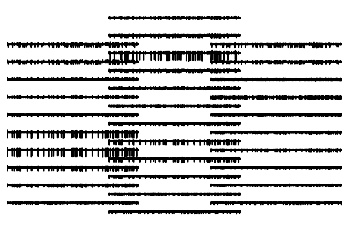

In [25]:
mr.plot_recordings(recgen)

<AxesSubplot:>

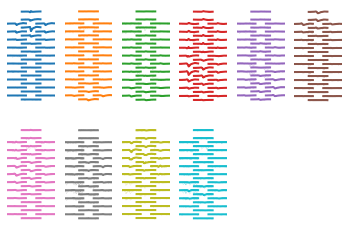

In [34]:
mr.plot_waveforms(recgen)

<AxesSubplot:>

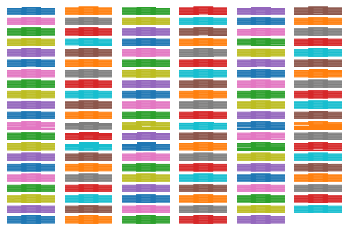

In [36]:
mr.plot_templates(tempgen)